<a href="https://colab.research.google.com/github/tranhuudan-02573/MachineLearning/blob/main/Lab_2_20130218_TranHuuDan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import The Libraries
import pandas as pd
import numpy as np



In [ ]:
# read data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx')





In [ ]:
df.count()

Invoice        417534
StockCode      417534
Description    417534
Quantity       417534
InvoiceDate    417534
Price          417534
Customer ID    417534
Country        417534
Revenue        417534
dtype: int64

In [ ]:
df = df[df['Customer ID'].notna()]
df.count()

Invoice        417534
StockCode      417534
Description    417534
Quantity       417534
InvoiceDate    417534
Price          417534
Customer ID    417534
Country        417534
dtype: int64

In [ ]:
df.info()

In [ ]:
import datetime

In [ ]:
tx_user = pd.DataFrame(df['Customer ID'].unique())
tx_user.columns = ['Customer ID']

In [ ]:
tx_user.describe()

,Customer ID
count,4383.000000
mean,15350.611453
std,1700.737934
min,12346.000000
25%,13880.500000
50%,15354.000000
75%,16837.000000
max,18287.000000


In [ ]:
# cal Recency
#create a generic user dataframe to keep CustomerID and new segmentation scores



#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = df.groupby('Customer ID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['Customer ID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
current_day = max(tx_max_purchase['MaxPurchaseDate'])+ datetime.timedelta(days=1)
tx_max_purchase['Recency'] = ( current_day - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user_purchase = pd.merge(tx_user, tx_max_purchase[['Customer ID','Recency']], on='Customer ID')



In [ ]:
tx_user_purchase.head()

In [ ]:
tx_user_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4383 non-null   float64
 1   Recency      4383 non-null   float64
dtypes: float64(2)
memory usage: 102.7 KB


In [ ]:
tx_user_purchase.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def show_col(x):
  fig, ax = plt.subplots()
  sns.distplot(x)
  sns.set_theme()

  plt.show()

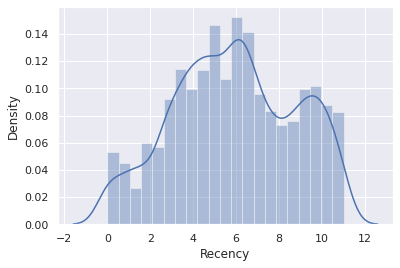

In [ ]:
show_col(tx_user_purchase['Recency'])

In [ ]:
from scipy import stats

def analyze_skewness_positive(x):
    fig, ax = plt.subplots(2, 2, figsize=(7,7))
    sns.distplot(x, ax=ax[0,0])
    sns.distplot(np.log(x), ax=ax[0,1],axlabel = 'log')
    sns.distplot(np.sqrt(x), ax=ax[1,0],axlabel = 'sqrt')
    sns.distplot(stats.boxcox(x)[0], ax=ax[1,1],axlabel = 'boxcox')
    plt.tight_layout()
    plt.show()
    print('defalt')
    print(x.skew().round(2))
    print('log')
    print(np.log(x).skew().round(2))
    print('sqrt')
    print(np.sqrt(x).skew().round(2))
    print('boxcox')
    print(pd.Series(stats.boxcox(x)[0]).skew().round(2))

In [ ]:
def analyze_skewness_negative(x):
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    sns.distplot(x, ax=ax[0])
    sns.distplot(np.cbrt(x), ax=ax[1],axlabel = 'cbrt')
    plt.show()
    print('defalt')
    print(x.skew().round(2))
    print('cbrt')
    print(np.cbrt(x).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: ignored

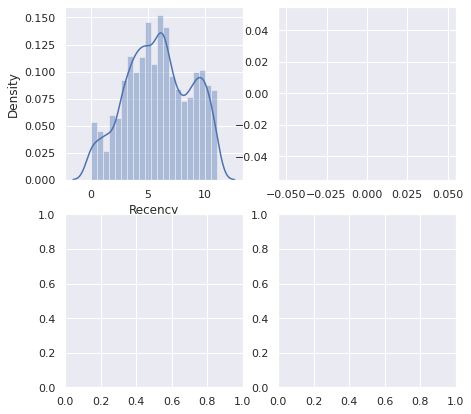

In [ ]:
analyze_skewness_positive(tx_user_purchase['Recency'])

In [ ]:
tx_user_purchase['Recency'] = stats.boxcox(tx_user_purchase['Recency'])[0]

ValueError: ignored

In [ ]:
tx_user_purchase.describe()

,Customer ID,Recency
count,4383.000000,4383.000000
mean,15350.611453,5.904994
std,1700.737934,2.826514
min,12346.000000,0.000000
25%,13880.500000,3.761134
50%,15354.000000,5.905047
75%,16837.000000,8.190792
max,18287.000000,11.011024


In [ ]:
# cal Frequency

#get order counts for each user and create a dataframe with it
tx_frequency = df.groupby('Customer ID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['Customer ID','Frequency']

#add this data to our main dataframe
tx_user_frequency = pd.merge(tx_user, tx_frequency, on='Customer ID')

In [ ]:
tx_user_frequency.head()

In [ ]:
tx_user_frequency.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


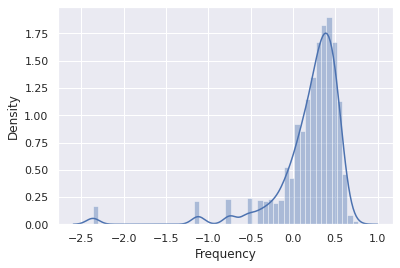

In [ ]:
show_col(tx_user_frequency['Frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

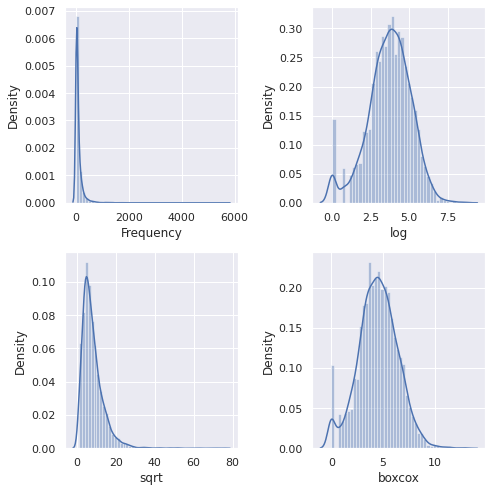

defalt
12.79
log
-0.4
sqrt
2.65
boxcox
0.01


In [ ]:
analyze_skewness_positive(tx_user_frequency['Frequency'])

In [ ]:
tx_user_frequency['Frequency'] = pd.Series(np.log(tx_user_frequency['Frequency'])).values

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
tx_user_frequency.head()

In [ ]:
tx_user_frequency.info()

In [ ]:
tx_user_frequency.describe()

In [ ]:
# cal MonetaryValue

#calculate revenue for each customer
df['Revenue'] = df['Price'] * df['Quantity']
tx_revenue = df.groupby('Customer ID').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user_revenue = pd.merge(tx_user, tx_revenue, on='Customer ID')


In [ ]:
tx_user_revenue.head()

In [ ]:
tx_user_revenue.info()

In [ ]:
tx_user_revenue.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


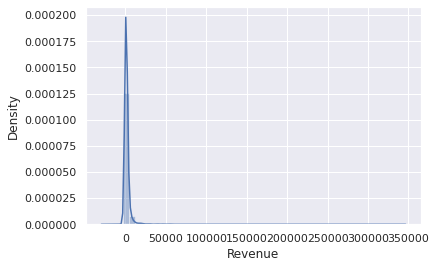

In [ ]:
show_col(tx_user_revenue['Revenue'])

In [ ]:
pd.Series(np.cbrt(tx_user_revenue['Revenue'])).values

array([1.29977934, 1.43270181, 1.26835661, ..., 1.22847391, 1.2364688 ,
       1.24645605])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


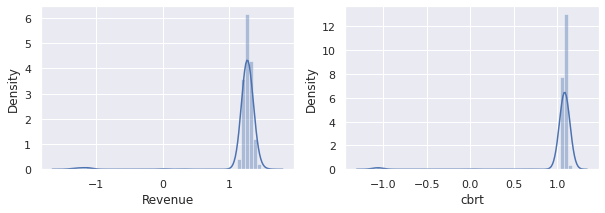

defalt
-6.23
cbrt
-6.52


In [ ]:
analyze_skewness_negative(tx_user_revenue['Revenue'])

In [ ]:
tx_user_revenue['Revenue'] = pd.Series(np.cbrt(tx_user_revenue['Revenue'])).values
tx_user_revenue.head()

,Customer ID,Revenue
0,13085.0,1.299779
1,13078.0,1.432702
2,15362.0,1.268357
3,18102.0,1.603073
4,12682.0,1.414540


In [ ]:
tx_user_revenue.info()

In [ ]:
tx_user_revenue.describe()

In [ ]:
# merge RFM
from functools import reduce

In [ ]:


dfs = [ tx_user_revenue, tx_user_purchase,tx_user_frequency]

#merge all DataFrames into one
tx_rfm = reduce(lambda  left,right: pd.merge(left,right,on=['Customer ID'],
                                            how='inner'), dfs)

tx_rfm.head()


,Customer ID,Revenue,Recency,Frequency
0,13085.0,1.299779,6.064023,63
1,13078.0,1.432702,0.741220,475
2,15362.0,1.268357,6.974891,40
3,18102.0,1.603073,0.000000,635
4,12682.0,1.414540,0.000000,517


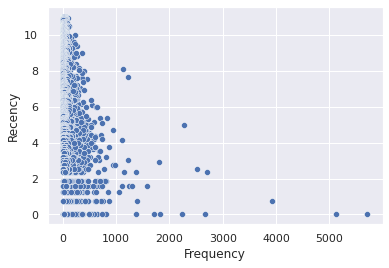

In [ ]:
sns.scatterplot(data=tx_rfm, x="Frequency", y="Recency")

In [ ]:
del tx_rfm['Customer ID']

In [ ]:
tx_rfm.head()

,Revenue,Recency,Frequency
0,1.299779,6.064023,63
1,1.432702,0.741220,475
2,1.268357,6.974891,40
3,1.603073,0.000000,635
4,1.414540,0.000000,517


In [ ]:
tx_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Revenue    4383 non-null   float64
 1   Recency    4383 non-null   float64
 2   Frequency  4383 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 137.0 KB


In [ ]:
tx_rfm.describe()

,Revenue,Recency,Frequency
count,4383.000000,4383.000000,4383.000000
mean,1.222856,5.904994,95.262149
std,0.362345,2.826514,204.903882
min,-1.455318,0.000000,1.000000
25%,1.232920,3.761134,18.000000
50%,1.271535,5.905047,44.000000
75%,1.315600,8.190792,103.000000
max,1.603073,11.011024,5710.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


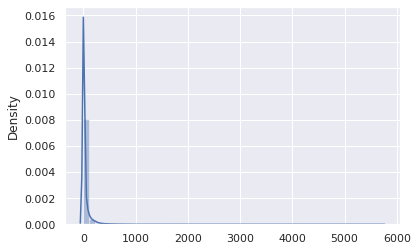

In [ ]:
show_col(tx_rfm)

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler


In [ ]:
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(tx_rfm)
customers_normalized = scaler.transform(tx_rfm)


In [ ]:
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[0. 0. 0.]
[1. 1. 1.]


In [ ]:
pd.DataFrame(customers_normalized).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4383 non-null   float64
 1   1       4383 non-null   float64
 2   2       4383 non-null   float64
dtypes: float64(3)
memory usage: 102.9 KB


In [ ]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,0.199520,0.056270,0.319875
1,2.946524,-1.827114,1.771142
2,-0.187807,0.378565,-0.006455
3,11.178010,-2.089382,1.979696
4,2.436009,-2.089382,1.832009


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


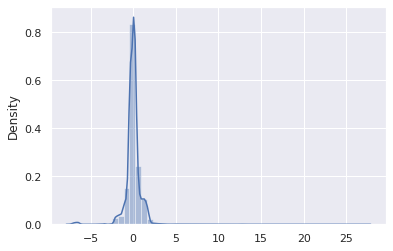

In [ ]:
show_col(customers_normalized)

In [ ]:
pd.DataFrame(customers_normalized).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4383 non-null   float64
 1   1       4383 non-null   float64
 2   2       4383 non-null   float64
dtypes: float64(3)
memory usage: 102.9 KB


In [ ]:
pd.DataFrame(customers_normalized).describe()

,0,1,2
count,4.383000e+03,4.383000e+03,4.383000e+03
mean,9.078347e-17,4.539173e-17,2.593813e-17
std,1.000114e+00,1.000114e+00,1.000114e+00
min,-7.392079e+00,-2.089382e+00,-4.600835e-01
25%,2.777868e-02,-7.585687e-01,-3.771083e-01
50%,1.343609e-01,1.854763e-05,-2.502051e-01
75%,2.559868e-01,8.087909e-01,3.776763e-02
max,1.049447e+00,1.806682e+00,2.740494e+01


In [ ]:
# choose k for k means agorthism

from sklearn.cluster import KMeans

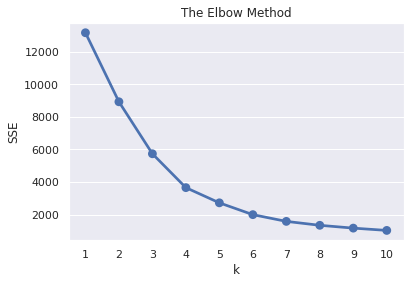

In [ ]:

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# chon k = 2
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4383,)

In [ ]:
tx_rfm.shape

(3, 4)

In [ ]:
# phan cum
tx_rfm["Cluster"] = model.labels_
tx_rfm.head()

,Revenue,Recency,Frequency,Cluster
0,1.299779,6.064023,63,0
1,1.432702,0.741220,475,1
2,1.268357,6.974891,40,0
3,1.603073,0.000000,635,1
4,1.414540,0.000000,517,1


In [ ]:
tx_rfm.describe()

In [ ]:
tx_rfm.groupby('Cluster')

In [ ]:
tx_rfm.head()

,Cluster,Recency,Frequency,Revenue
0,0,7.963354,42.637826,1.251150
1,1,3.376133,160.726172,1.305795
2,2,8.710040,7.470000,-1.072601


In [ ]:
tx_rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Revenue':['mean']}).round(1)

,Recency,Frequency,Revenue
,mean,mean,mean
Cluster,,,
0,8.0,42.6,1.3
1,3.4,160.7,1.3
2,8.7,7.5,-1.1


In [ ]:
tx_rfm_cluster1 = tx_rfm.groupby('Cluster').Recency.mean().reset_index()

In [ ]:
tx_rfm_cluster2 = tx_rfm.groupby('Cluster').Frequency.mean().reset_index()

In [ ]:
tx_rfm_cluster3 = tx_rfm.groupby('Cluster').Revenue.mean().reset_index()

In [ ]:
clusters = [ tx_rfm_cluster1, tx_rfm_cluster2,tx_rfm_cluster3]

#merge all DataFrames into one
tx_rfm = reduce(lambda  left,right: pd.merge(left,right,on=['Cluster'],
                                            how='outer'), clusters)



In [ ]:
del tx_rfm['Cluster']

In [ ]:
pd.DataFrame(tx_rfm).head()

,Cluster,Recency,Frequency,Revenue
0,0,7.963354,42.637826,1.251150
1,1,3.376133,160.726172,1.305795
2,2,8.710040,7.470000,-1.072601


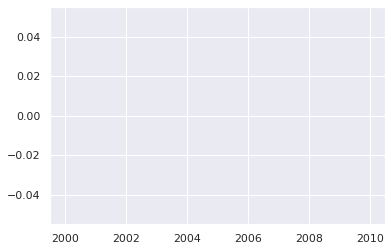

In [ ]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="Revenue")

wide_df = pd.DataFrame(tx_rfm, index, ["a", "b", "c"])
sns.scatterplot(data=wide_df)

AttributeError: ignored

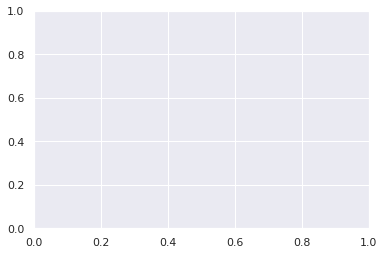

In [ ]:
sns.scatterplot(data=tx_rfm,  x="Recency",y="Frequency",col="Revenue",kind="scatter")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


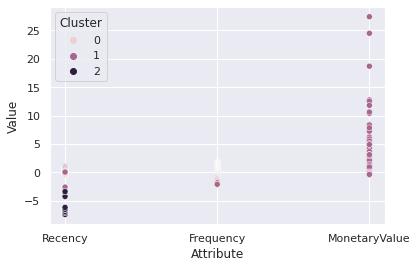

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
# df_normalized['ID'] = tx_rfm.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=[ 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.scatterplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)


#################
# sns.lmplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

